In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import serde.json

from utils.scenario_converter import extract_trajectory
from utils.scenario import Scenario, LaneCenter
from utils.loader import getFiles
from utils.in_memory_scenario_env import InMemoryScenarioEnv, TopDownInMemoryScenarioEnv

PROCESSED_WAYMO_SCENARIOS_PATH = "~/data/waymo_scenarios"

In [2]:
env = TopDownInMemoryScenarioEnv(config={"use_render": True, "manual_control": False})

[INFO] MetaDrive version: 0.4.1.2
[INFO] Sensors: [lidar: Lidar(50,), side_detector: SideDetector(), lane_line_detector: LaneLineDetector(), dashboard: VehiclePanel(), main_camera: MainCamera(1200, 900)]
[INFO] Render Mode: onscreen


In [3]:
scenario_index = 0

with open(getFiles(PROCESSED_WAYMO_SCENARIOS_PATH)[scenario_index], "r") as f:
    scenario = serde.json.from_json(Scenario, f.read())
    trajectory = extract_trajectory(scenario.tracks[scenario.ego_track_index])
# reset
env.set_scenario(scenario)

In [4]:
env.reset()
# set the initial state
for i in range(len(trajectory)):
    st = trajectory[i]
    env.vehicle.set_position(scenario.tracks[scenario.ego_track_index].states[i].position)
    env.vehicle.set_velocity(st.velocity)
    env.vehicle.set_heading_theta(st.heading)
    obs, r, tm, tc, i = env.step([0, 0])

[INFO] Assets version: 0.4.1.2


Known pipe types:
  glxGraphicsPipe
(1 aux display modules not yet loaded.)
:device(warning): /dev/input/event20 is not readable, some features will be unavailable.
:device(warning): /dev/input/event21 is not readable, some features will be unavailable.
:device(warning): /dev/input/event22 is not readable, some features will be unavailable.
[WARNING] show_dest_mark and show_line_to_dest are not supported in TrajectoryNavigation (trajectory_navigation.py:34)


AssertionError: 

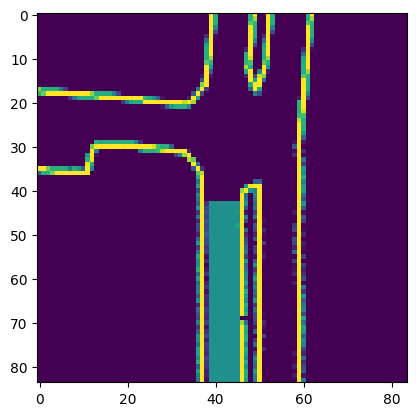

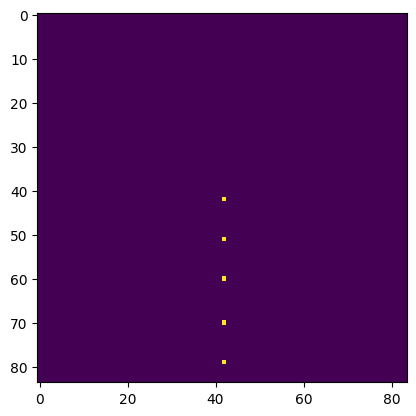

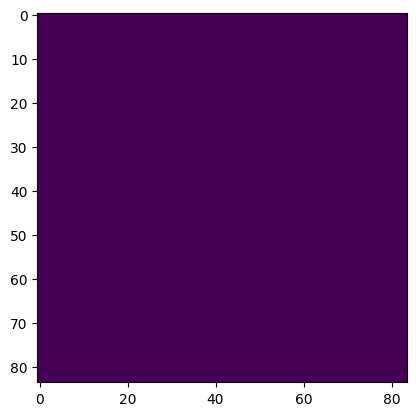

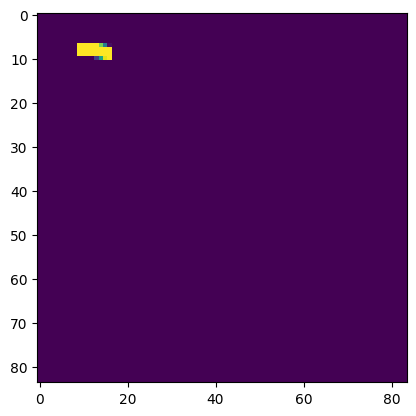

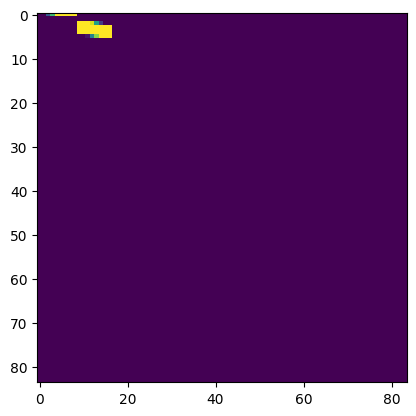

In [ ]:
for i in range(5):
    plt.imshow(obs[:,:,i])
    plt.show()

In [ ]:
env.close()